
<div id='id-table'/>

### Linear Regression

- A basic linear regression is a statistical model that represent the relationship between predictor variables ***X***<sub>i</sub> with a response variable ***Y***. 

- The model assumes a linear relation where the intercept of the line is usually represented by ***$\beta$<sub>0</sub>*** and the slope of the variables by a  coefficient ***$\beta$<sub>i</sub>*** . 

$$ Y = \beta_{0} + \beta_{1} * X_{1} + \beta_{2} * X_{2} + \varepsilon $$

- The equation can be written in linear algebra notation if a columns of 1 is added to the ***X*** matrix:

$$ Y=  \beta . X + \varepsilon $$

- The predicted values are often called fitted values and symbolized as $\hat{Y}$.

$$ \hat{Y} =  \hat{\beta} * X $$

- The coefficients $\hat{\beta_{i}}$ can be calculated as:

$$ \hat{{\beta_{i}}} = Inverse((X^T . X)) . X^T . Y  $$

- The intercept is in the same position as the column of 1s in the ***X*** matrix, the rest of the values are slopes for ***Xi***


In [1]:
# libraries
import numpy as np
import pandas as pd

# predictor variable
X = pd.DataFrame({'x1':[1,2,3,4,5,6,7,8]}) #,
                  #'x2':[7,8,6,5,4,3,2,1]})

# response variable
y =  pd.DataFrame({'y':[30,45,51,57,60,65,70,71]})

X,y

/Users/adames/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


(   x1
 0   1
 1   2
 2   3
 3   4
 4   5
 5   6
 6   7
 7   8,
     y
 0  30
 1  45
 2  51
 3  57
 4  60
 5  65
 6  70
 7  71)

In [2]:
# Write code here:
class SimpleLinearRegression:
    """Class for linear regression"""
    # initialize account type
    def __init__(self,intercept:bool = True):
        self.intercept = intercept
        
    # prepares data
    def fit(self,X_,y_):

        # if pandas, change to array
        if isinstance(X_, pd.DataFrame):
            X_ = X_.to_numpy()

        if isinstance(y_, pd.DataFrame):
            y_ = y_.to_numpy()

        # number of variables
        num_cols = len(X_.T)

        if self.intercept:
            # adds 1 for intercept
            X_ = np.hstack((X_,np.ones([X_.shape[0],1], X_.dtype)))
            # coeeficients including intercept
            self.b_ = np.round(np.dot(np.linalg.inv(np.dot(X_.T ,X_)),np.dot(X_.T ,y_)).tolist(),3)
            self.intercept_ =  self.b_[-1]
            self.coef_ = self.b_[0:num_cols]

        else:
            # coeeficients excluding intercept
            self.b_ = np.round(np.dot(np.linalg.inv(np.dot(X_.T ,X_)),np.dot(X_.T ,y_)).tolist(),3)
            self.intercept_ =  0
            self.coef_ = self.b_[0:num_cols+1]
        
        return self
        
    # predicted values
    def predict(self,X_):

        # if pandas, change to array
        if isinstance(X_, pd.DataFrame):
            X_ = X_.to_numpy()

        # adds 1 for intercept
        if self.intercept:
            X_ = np.hstack((X_,np.ones([X_.shape[0],1], X_.dtype)))

        # predict values
        y_fitted = np.array(np.dot(X_,self.b_).tolist())
        
        return y_fitted

# driver code,  linear regression fit
simple_linear_reg = SimpleLinearRegression().fit(X,y)

# Predict a Response
y_pred = simple_linear_reg.predict(X)

# prints
print('intercept: ','\n', simple_linear_reg.intercept_)
print('variable coefficients: ','\n', simple_linear_reg.coef_)
print('fitted values: ','\n', y_pred)

intercept:  
 [31.643]
variable coefficients:  
 [[5.44]]
fitted values:  
 [[37.083]
 [42.523]
 [47.963]
 [53.403]
 [58.843]
 [64.283]
 [69.723]
 [75.163]]


### Verifying class with sklearn Linear Regression class

In [3]:
from sklearn.linear_model import LinearRegression

# skleanr linear regression fit
linear_reg = LinearRegression(fit_intercept=True).fit(X,y)

# Predict a Response and print it:
y_pred = linear_reg.predict(X)

# prints
print('intercept: ','\n', linear_reg.intercept_)
print('variable coefficients: ','\n', linear_reg.coef_)
print('fitted values: ','\n', y_pred)

intercept:  
 [31.64285714]
variable coefficients:  
 [[5.44047619]]
fitted values:  
 [[37.08333333]
 [42.52380952]
 [47.96428571]
 [53.4047619 ]
 [58.8452381 ]
 [64.28571429]
 [69.72619048]
 [75.16666667]]


# visualizing parameters 

In [4]:
# intercept coef
plot_intercept = np.random.normal(linear_reg.intercept_, 3, size=8)
plot_intercept[-1] = linear_reg.intercept_

# var coef
plot_coef = np.random.normal(linear_reg.coef_[0], 3, size=8)
plot_coef[-1] = linear_reg.coef_
plot_coef

array([10.25342585, 10.1776554 ,  5.09059923,  7.3695986 ,  6.16106828,
        8.04778036,  4.22201006,  5.44047619])

In [5]:
# given b0 & b1 parameters, estimates rmse 
def rmse_given_bs(b0:float,b1:float, y:pd.DataFrame) -> float:
    squared_diff = []
    counter = -1
    for i in X.values:
        counter += 1
        squared_diff.append(((y.iloc[counter,0] - (b0 + b1*i[0]))**2))
    rmse_ = (sum(squared_diff)/len(squared_diff))**.5
    return rmse_

# fill map for rand vals
b0s = []
b1s = []
root_mean_sqr_err = []
for i in range(8):
    for j in range(8):
        b0s.append(plot_intercept[i])
        b1s.append(plot_coef[j])
        root_mean_sqr_err.append(rmse_given_bs(b0 = plot_intercept[i],b1 = plot_coef[j], y = y))

/var/folders/qf/w2n_959j22x1qz6775lxlqsm0000gn/T/ipykernel_3693/998018973.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heat_map = data.copy().pivot("B1", "B0", "RMSE")


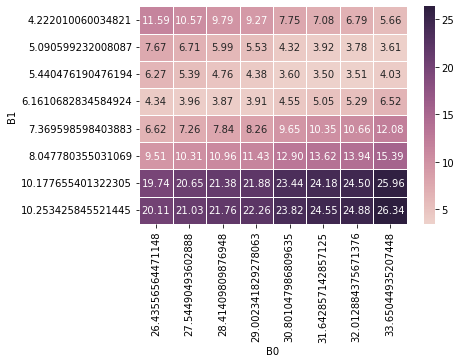

In [6]:
import seaborn as sns
data = pd.DataFrame({'B0':b0s,'B1':b1s,'RMSE':root_mean_sqr_err})
heat_map = data.copy().pivot("B1", "B0", "RMSE")
sns.heatmap(heat_map, annot=True, fmt=".2f", linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True));

In [19]:
import plotly.express as px
import plotly.graph_objects as go

# scatterplot data
data = pd.DataFrame({'x':[1,2,3,4,5,6,7,8], 'y':[30,45,51,57,60,65,70,71]}) 
fig = px.scatter(data, 'x', 'y')

# add linear reg fit
fig.add_trace(go.Scatter(x=X.iloc[:,0], y=[i[0] for i in y_pred], name="Linear Reg", line_shape='linear'))

fig.show()

### Deep learning

/Users/adames/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


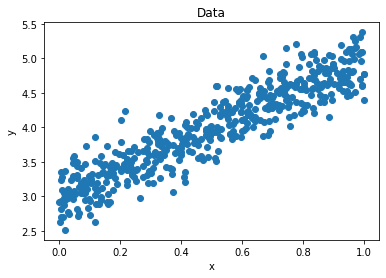

In [1]:
#import dependencies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable

x = np.random.rand(500)
noise = np.random.randn(500)/4
m = 2 # slope or weight
c = 3 # coffecient or bias
# Equation of the line y = mx + c
y = x * m + c + noise

#Visualise Our data
plt.scatter(x,y)
plt.title("Data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)
print(inputs[:5])
print(targets[:5])

tensor([0.0612, 0.1184, 0.7398, 0.5504, 0.4862], dtype=torch.float64)
tensor([3.4358, 3.8670, 4.6611, 4.1674, 4.1812], dtype=torch.float64)


In [3]:
# Changing the data type to float32 as our model accepts float32 data type
inputs = inputs.type(torch.float32) 
targets = targets.type(torch.float32)

In [4]:
# reshaping our data into n-rows and 1 columns. Model takes 2D array as an input
inputs = inputs.reshape(-1,1)
targets = targets.reshape(-1,1)

In [5]:
#x * m + c
actual_targets = torch.from_numpy(x * m + c)
actual_targets = actual_targets.type(torch.float32)
actual_targets = actual_targets.reshape(-1,1)
print(actual_targets[:5])


tensor([[3.1223],
        [3.2367],
        [4.4796],
        [4.1008],
        [3.9723]])


In [6]:
# Define linear regression model
model = nn.Linear(1, 1) # (no. of input features, no. of output features)
print(model.weight) # Weight of the model
print(model.bias) # Bias of the model


Parameter containing:
tensor([[-0.7925]], requires_grad=True)
Parameter containing:
tensor([0.4215], requires_grad=True)


In [11]:
# Parameters
list(model.parameters())


[Parameter containing:
 tensor([[-0.7925]], requires_grad=True),
 Parameter containing:
 tensor([0.4215], requires_grad=True)]

In [12]:
# Define loss function
import torch.nn.functional as F

loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(16.4359, grad_fn=<MseLossBackward0>)


In [13]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr --> learning rate

In [14]:
from time import sleep
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt,inputs, targets):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):

        # Train with batches of data
        for xb,yb in zip(inputs, targets):
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
            
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            preds_ = model(inputs)
            plt.scatter(inputs,targets, label="Data")
            plt.plot(inputs,preds_.detach().numpy(),"r-", label="Prediction")
            plt.title('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            plt.legend()
            #plt.savefig("lr_images_final/{}.png".format(epoch+1))
            plt.show()
            sleep(.2)

Epoch [10/310], Loss: 16.1739


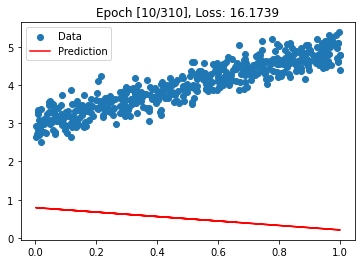

Epoch [20/310], Loss: 12.7619


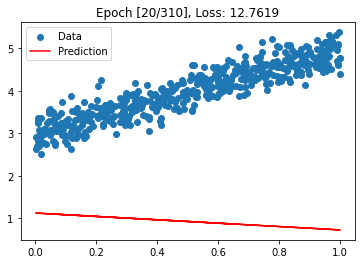

Epoch [30/310], Loss: 10.0904


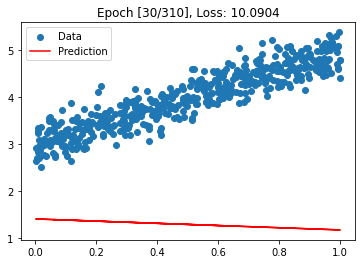

Epoch [40/310], Loss: 7.9962


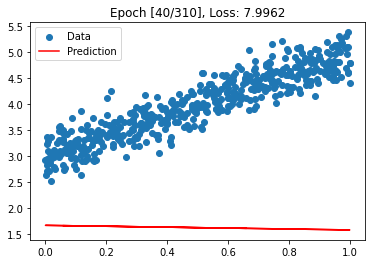

Epoch [50/310], Loss: 6.3526


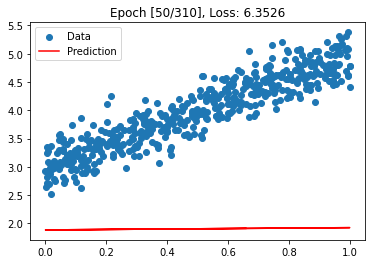

Epoch [60/310], Loss: 5.0609


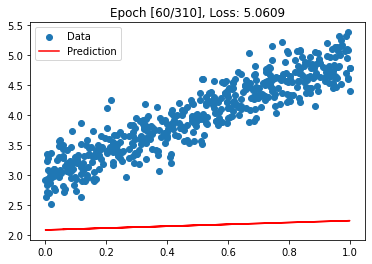

Epoch [70/310], Loss: 4.0443


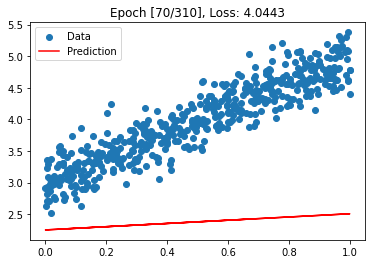

Epoch [80/310], Loss: 3.2428


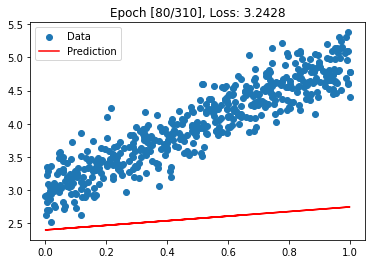

Epoch [90/310], Loss: 2.6097


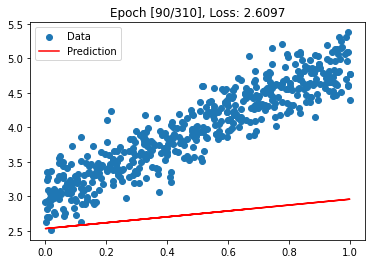

Epoch [100/310], Loss: 2.1087


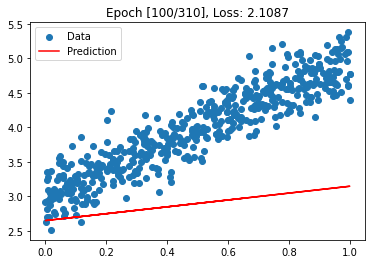

Epoch [110/310], Loss: 1.7114


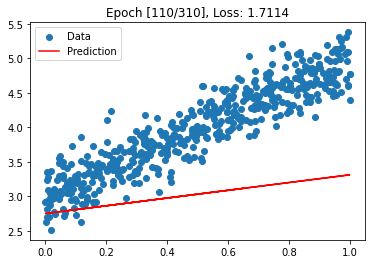

Epoch [120/310], Loss: 1.3954


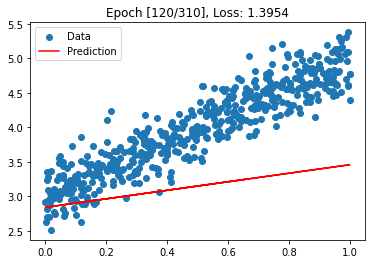

Epoch [130/310], Loss: 1.1437


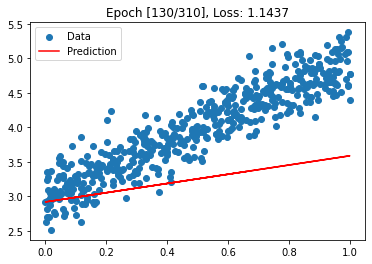

Epoch [140/310], Loss: 0.9424


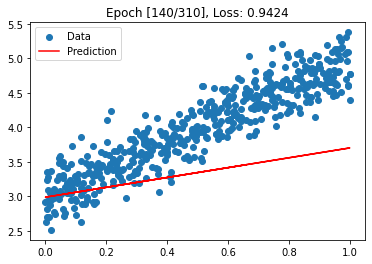

Epoch [150/310], Loss: 0.7811


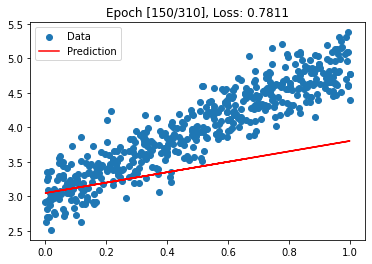

Epoch [160/310], Loss: 0.6515


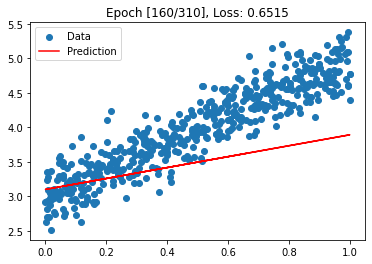

Epoch [170/310], Loss: 0.5468


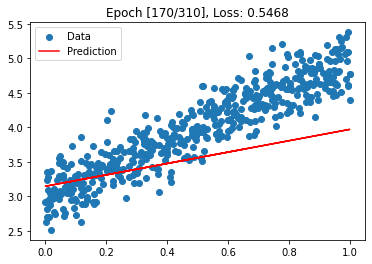

Epoch [180/310], Loss: 0.4621


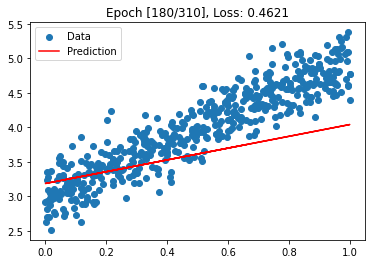

Epoch [190/310], Loss: 0.3933


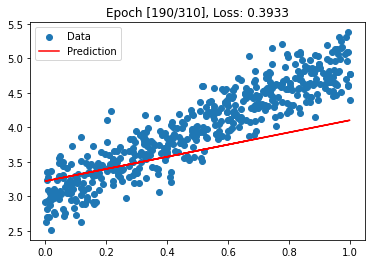

Epoch [200/310], Loss: 0.3372


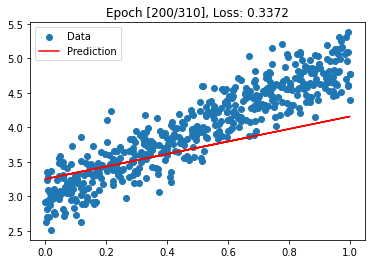

Epoch [210/310], Loss: 0.2912


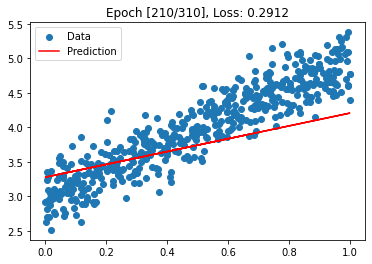

Epoch [220/310], Loss: 0.2534


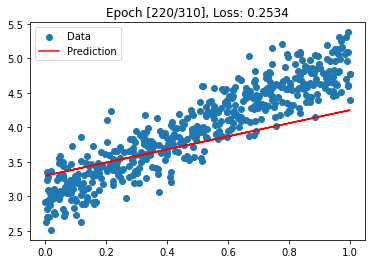

Epoch [230/310], Loss: 0.2223


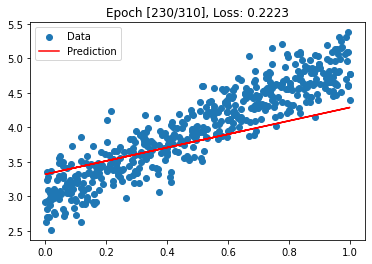

Epoch [240/310], Loss: 0.1964


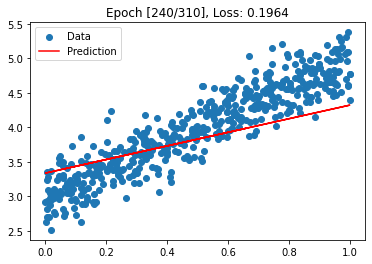

Epoch [250/310], Loss: 0.1749


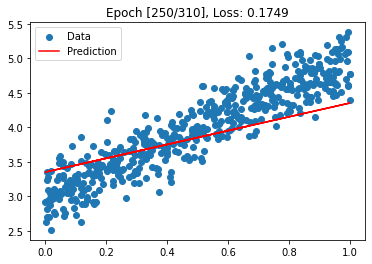

Epoch [260/310], Loss: 0.1569


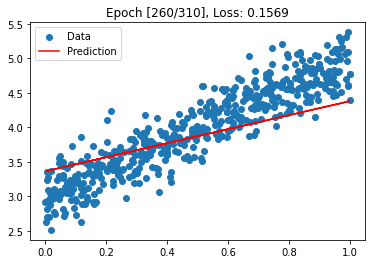

Epoch [270/310], Loss: 0.1418


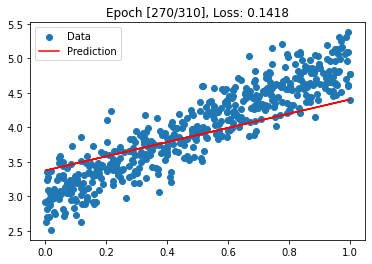

Epoch [280/310], Loss: 0.1291


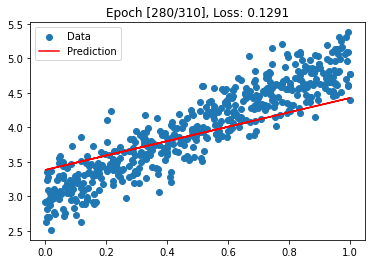

Epoch [290/310], Loss: 0.1183


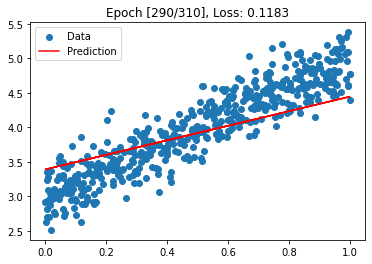

Epoch [300/310], Loss: 0.1091


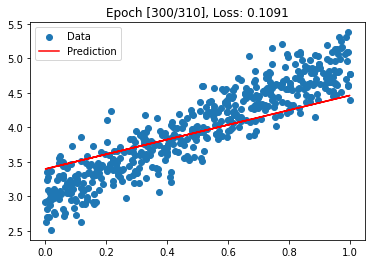

Epoch [310/310], Loss: 0.1013


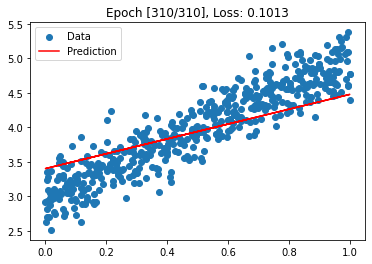

In [15]:
fit(310, model, loss_fn, opt,inputs, targets)

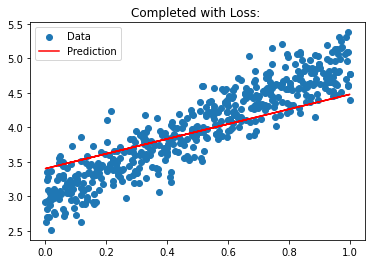

In [16]:
preds = model(inputs)
plt.scatter(inputs,targets, label="Data")
plt.plot(inputs,preds.detach().numpy(),"r-", label="Prediction")
plt.title('Completed with Loss: ')
plt.legend()
plt.show()
